# Template

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy.optimize import curve_fit

plt.style.use('science')
plt.rcParams.update({'font.size': 14})

## Malus

In [31]:
# I = I_o * cos(theta)**2
theta = [140, 130, 120, 110, 100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0, -10, -20, -30, -40]
dtheta = 0.5
U = np.array([188.8, 189.0, 177.0, 166.8, 140.6, 95.5, 72.2, 34.7, 10.6, 0.7, 3.9, 21.8, 51.7, 86.4, 125.6, 135.4, 176.8, 188.3, 199])
dU_Multimeter = U * 0.005 + 0.2  # mV
dU_Detektor = U * 0.02 + 0.3  # mV 
dU = np.sqrt(dU_Multimeter**2 + dU_Detektor**2)  # mV


A: 206.19426438592953 pm 1.6695387302199451
phi -2.3994351203667317 pm 0.004928019010398825


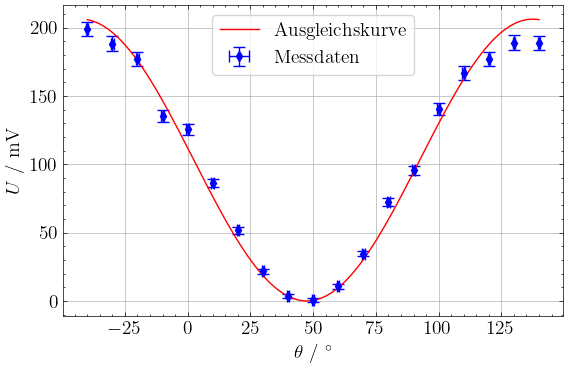

In [34]:
def ffit(t, A, p):
    return A*np.cos(t*2*np.pi/360 + p)**2

theta_fit = np.linspace(-40, 140, 1000)
popt, pcov = curve_fit(ffit, theta, U, sigma=dU+1, absolute_sigma=True)
A, p= popt
dA, dp = np.sqrt(np.diag(pcov))
U_fit = ffit(theta_fit, A, p)

plt.figure(figsize=(6,4))

plt.errorbar(theta, U, yerr=dU+1, xerr=dtheta, fmt='d', color='blue', label='Messdaten', markersize=5, capsize=4)
plt.plot(theta_fit, U_fit, 'r-', label='Ausgleichskurve')

plt.xlabel(r"$\theta$ / $^\circ$", fontsize=14) 
plt.ylabel(r'$U$ / mV', fontsize=14)  
plt.legend(loc='best', fontsize=14, frameon=True)
plt.grid(True)

plt.tight_layout()
print(f'A: {A} pm {dA}')
print(f'phi {p} pm {dp}')

## Zuckerwasser

In [40]:
# phi = phi_0 * L * C
L = 18.2 #mm
dL = 0.5  #mm

phi_0 = 6.65

theta_0 = np.array([48, 49, 49, 48, 49])
theta_1 = np.array([79, 78, 78, 77, 78])
dtheta_i = 1
theta = theta_1 - theta_0
theta_bar = np.mean(theta)
dtheta = np.sqrt(np.std(theta)**2 / len(theta) + dtheta_i**2)

C = theta_bar / (phi_0 * L) * 100
dC = C * (dtheta/theta_bar + dL/L)
print(C, dC)

24.291497975708502 1.5448779240522583


## 3D Brille

In [81]:
theta = np.array([90, 85, 80, 75, 70, 65])
dtheta = 1
U = np.array([92.8, 38.3, 5.4, 5.2, 33.6, 90.7])
dU_Multimeter = U * 0.005 + 0.2  # mV
dU_Detektor = U * 0.02 + 0.3  # mV 
dU = np.sqrt(dU_Multimeter**2 + dU_Detektor**2)  # mV

In [82]:
def malus_fit(theta_deg, A, theta0):
    theta_rad = np.deg2rad(theta_deg - theta0)
    return A * np.cos(theta_rad)**2

p0 = [100, 75]  
popt, pcov = curve_fit(malus_fit, theta, U, p0=p0, sigma=dU, absolute_sigma=True)
A_fit, theta0_fit = popt
dA_fit, dtheta0_fit = np.sqrt(np.diag(pcov))

theta_fit = np.linspace(0, 180, 500)
U_fit = malus_fit(theta_fit, A_fit, theta0_fit)

theta_min = theta0_fit 
dtheta_min = dtheta0_fit
theta_max = theta0_fit - 90
dtheta_max = dtheta0_fit

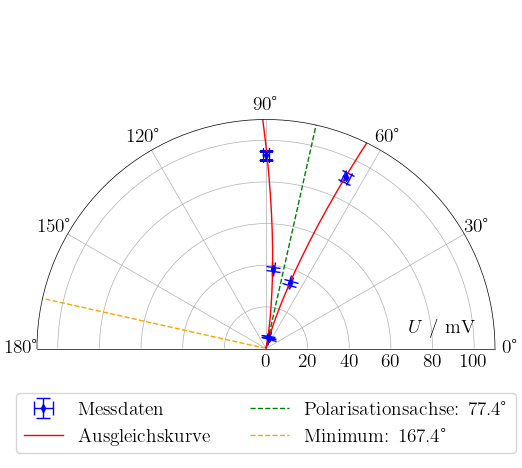

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5), subplot_kw={'projection': 'polar'})

line_pol = ax.plot([np.deg2rad(theta_max), np.deg2rad(theta_max)], [0, A_fit], 
        'g--', linewidth=1, label=f'Polarisationsachse: {theta_max:.1f}°')

line_min = ax.plot([np.deg2rad(theta_min), np.deg2rad(theta_min)], [0, A_fit], 
        'orange', linestyle='--', linewidth=1, label=f'Minimum: {theta_min:.1f}°')

points = ax.errorbar(np.deg2rad(theta), U, xerr=np.deg2rad(dtheta), yerr=dU, 
            fmt='d', color='blue', markersize=4, capsize=5, label='Messdaten')

line_fit = ax.plot(np.deg2rad(theta_fit), U_fit, 'r-', linewidth=1, label='Ausgleichskurve')

ax.set_theta_zero_location('E')  
ax.set_theta_direction(1)  
ax.set_thetamin(0)  
ax.set_thetamax(180)  

ax.set_ylim(0, 110)
ax.text(np.deg2rad(5), 85, r'$U$ / mV', fontsize=14, ha='center')

handles = [points, line_fit[0], line_pol[0], line_min[0]]
labels = ['Messdaten', 'Ausgleichskurve', f'Polarisationsachse: {theta_max:.1f}°', f'Minimum: {theta_min:.1f}°']
ax.legend(handles, labels, loc='lower center', frameon=True, fontsize=14, ncol=2)
ax.grid(True)

plt.tight_layout()

In [59]:
print(f"Fitparameter:")
print(f"  Amplitude A = ({A_fit:.1f} ± {dA_fit:.1f}) mV")
print(f"  Winkel minimaler Transmission θ_min = ({theta_min:.1f} ± {dtheta_min:.1f})°")
print(f"\nPolarisationsachse der 3D-Brille:")
print(f"  θ_max = θ_min - 90° = ({theta_max:.1f} ± {dtheta_max:.1f})°")
print(f"\nAlternative Messung (direkte Bestimmung des Minimums):")
print(f"  θ_min = (77,0 ± 0,5)°")
print(f"  θ_max = θ_min - 90° = ({theta_max - 1:.0f} ± 0,5)°")

Fitparameter:
  Amplitude A = (2029.3 ± 26.7) mV
  Winkel minimaler Transmission θ_min = (167.4 ± 0.1)°

Polarisationsachse der 3D-Brille:
  θ_max = θ_min - 90° = (77.4 ± 0.1)°

Alternative Messung (direkte Bestimmung des Minimums):
  θ_min = (77,0 ± 0,5)°
  θ_max = θ_min - 90° = (76 ± 0,5)°
